# Particle Selection Analysis: Picky + Match Criteria

This notebook selects proton and deuteron candidates from the LArIAT data based on beamline mass cuts. Beamline masses are from reco data. The analysis includes:

**Picky** means only one track coming through the wire chambers. **Match** means that the track projected from the wire chambers match the trajectory on the face of the LArTPC.

- **Selection Overlap**: Compares events passing picky-only, match-only, both criteria, or neither
- **Mass Distribution**: Visualises beamline mass distributions for different selection combinations
- **Proton Selection**: Defines high-purity proton candidates (600-1600 MeV) using both criteria (picky+match)
- **Deuteron Selection**: Identifies deuteron candidates (1600-2750 MeV) with inclusive selection (all candidates, including picky / match / neither)
- **Final Datasets**: Exports selected events to retrieve raw data from Fermilab 

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv("/Users/user/data/research/proton-deuteron/csv/picky+match.csv")

In [3]:
df

,run,subrun,event,p,m,beamline_mass
0,8675,12,1249,0,1,1082.48
1,8675,12,1250,0,0,120.62
2,8675,12,1256,0,1,893.74
3,8675,12,1257,1,0,180.31
4,8675,12,1258,1,1,-327.26
...,...,...,...,...,...,...
580633,9781,133,21593,0,1,1008.86
580634,9781,133,21596,0,1,1212.37
580635,9781,133,21614,0,0,951.96
580636,9781,133,21621,0,0,462.36


In [4]:
df = df[(df['beamline_mass'] > 0)].reset_index(drop=True)
df

,run,subrun,event,p,m,beamline_mass
0,8675,12,1249,0,1,1082.48
1,8675,12,1250,0,0,120.62
2,8675,12,1256,0,1,893.74
3,8675,12,1257,1,0,180.31
4,8675,12,1261,0,1,1102.05
...,...,...,...,...,...,...
480068,9781,133,21589,0,1,1337.60
480069,9781,133,21593,0,1,1008.86
480070,9781,133,21596,0,1,1212.37
480071,9781,133,21614,0,0,951.96


In [5]:
duplicates = df[df.duplicated()]
duplicates

,run,subrun,event,p,m,beamline_mass


In [6]:
# picky deuterons
df[(df['p'] == 1) & (df['beamline_mass'] > 1600)  & (df['beamline_mass'] < 2750)]

,run,subrun,event,p,m,beamline_mass
2074,8675,174,19207,1,0,2255.56
2846,8675,129,13724,1,0,2156.67
3114,8675,218,24688,1,0,1861.58
3708,8766,186,23136,1,1,2023.06
3802,8766,216,26697,1,0,1959.36
...,...,...,...,...,...,...
477677,9780,61,9366,1,0,1884.95
477973,9780,110,16916,1,0,1751.33
479187,9780,77,11841,1,0,1710.79
479203,9780,81,12442,1,0,1767.15


In [7]:
# picky+match deuterons
df[(df['p'] == 1) & (df['m'] == 1) & (df['beamline_mass'] > 1600) & (df['beamline_mass'] < 2750)]

,run,subrun,event,p,m,beamline_mass
3708,8766,186,23136,1,1,2023.06
12939,8680,11,1353,1,1,1805.71
16625,8733,110,11880,1,1,1898.83
21335,9488,5,372,1,1,1891.62
22377,9488,208,16590,1,1,2051.50
...,...,...,...,...,...,...
457758,9451,181,16181,1,1,1790.80
458566,9451,393,35173,1,1,2198.20
468960,9452,457,42813,1,1,1910.72
470474,9785,11,908,1,1,1738.54


In [49]:
def plot_mass_histogram(df, inclusive: bool, lower, upper):
    
    if inclusive:
        p = df[(df['p'] == 1)]['beamline_mass']
        m = df[(df['m'] == 1)]['beamline_mass']
        pm = df[(df['p'] == 1) & (df['m'] == 1)]['beamline_mass']
        rest = df[(df['p'] == 0) & (df['m'] == 0)]['beamline_mass']
        
    else:
        p = df[(df['p'] == 1) & (df['m'] == 0)]['beamline_mass']
        m = df[(df['m'] == 1) & (df['p'] == 0)]['beamline_mass']
        pm = df[(df['p'] == 1) & (df['m'] == 1)]['beamline_mass']
        rest = df[(df['p'] == 0) & (df['m'] == 0)]['beamline_mass']

    plt.figure(figsize=(8, 7))  # Create a figure with specified size

    plt.hist(
        rest,  # Data to plot
        bins=100,  # Number of bins
        color='grey',  # Bar color
        range=(lower, upper),  # Adjusted range to fit the filtered values
        alpha=0.2,  # Transparency of the bars
        label='Neither'  # Label for the data
    )

    plt.hist(
        m,  # Data to plot
        bins=100,  # Number of bins
        color='red',  # Bar color
        range=(lower, upper),  # Adjusted range to fit the filtered values
        alpha=0.5,  # Transparency of the bars
        label='Match'  # Label for the data
    )

    plt.hist(
        p,  # Data to plot
        bins=100,  # Number of bins
        color='orange',  # Bar color
        range=(lower, upper),  # Adjusted range to fit the filtered values
        alpha=0.5,  # Transparency of the bars
        label='Picky'  # Label for the data
    )

    plt.hist(
        pm,  # Data to plot
        bins=100,  # Number of bins
        color='blue',  # Bar color
        range=(lower, upper),  # Adjusted range to fit the filtered values
        alpha=0.5,  # Transparency of the bars
        label='Picky+Match'  # Label for the data
    )
    

    # Customize tick parameters for better visualization
    plt.tick_params(axis='x', labelsize=16, pad=8)
    plt.tick_params(axis='y', labelsize=16)

    # Label axes
    plt.xlabel('Beamline Mass [$MeV$]', fontsize=20)
    plt.ylabel('Frequency', fontsize=20)  # Added y-axis label for clarity

    # Add a title
    plt.title(f'Beamline Mass Deuteron Selection ({lower}-{upper} MeV - 10,029 events) {" without overlap" if not inclusive else ""}', fontsize=16)

    # Add a legend
    plt.legend()
    # Add a text box with the number of events shown in the histogram
    events_shown = (
        ((p >= lower) & (p <= upper)).sum() +
        ((m >= lower) & (m <= upper)).sum() +
        ((pm >= lower) & (pm <= upper)).sum() +
        ((rest >= lower) & (rest <= upper)).sum()
    )
    # Place the text box just below the legend
    # plt.gcf().text(0.67, 0.7, f'Events Shown: {events_shown}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    # Show the plot
    plt.show()

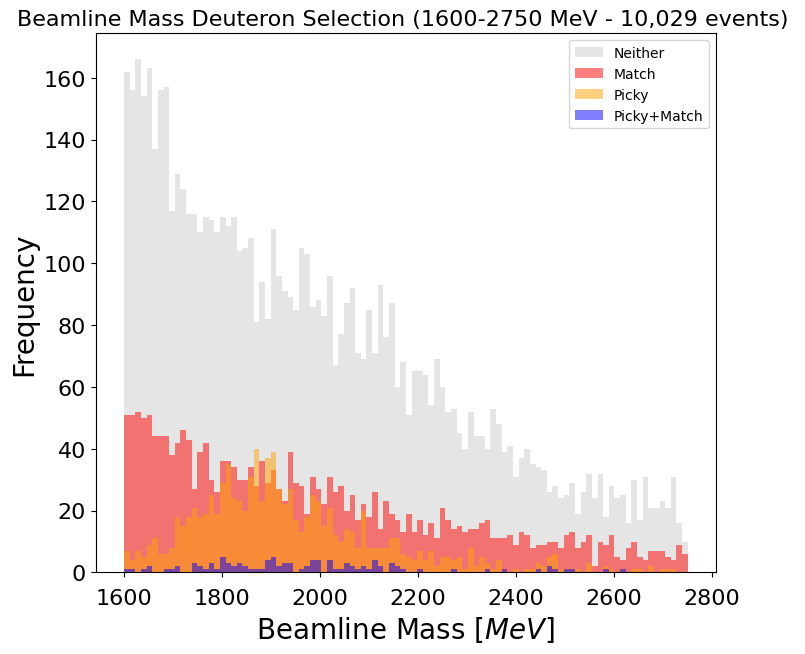

In [50]:
plot_mass_histogram(df, True, 1600, 2750)

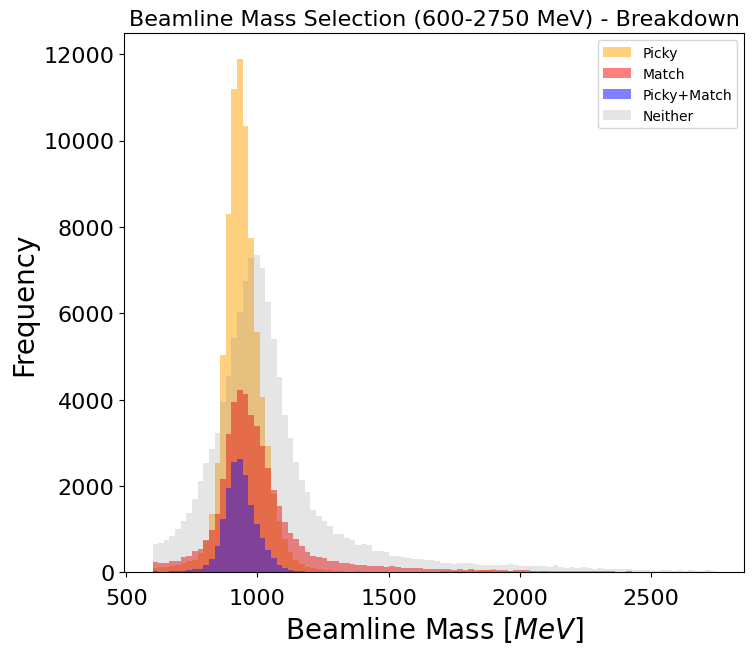

In [26]:
p = df[(df['p'] == 1)]['beamline_mass']
m = df[(df['m'] == 1)]['beamline_mass']
pm = df[(df['p'] == 1) & (df['m'] == 1)]['beamline_mass']
rest = df[(df['p'] == 0) & (df['m'] == 0)]['beamline_mass']

plt.figure(figsize=(8, 7))  # Create a figure with specified size

plt.hist(
    p,  # Data to plot
    bins=100,  # Number of bins
    color='orange',  # Bar color
    range=(600, 2750),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Picky'  # Label for the data
)

plt.hist(
    m,  # Data to plot
    bins=100,  # Number of bins
    color='red',  # Bar color
    range=(600, 2750),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Match'  # Label for the data
)

plt.hist(
    pm,  # Data to plot
    bins=100,  # Number of bins
    color='blue',  # Bar color
    range=(600, 2750),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Picky+Match'  # Label for the data
)

plt.hist(
    rest,  # Data to plot
    bins=100,  # Number of bins
    color='grey',  # Bar color
    range=(600, 2750),  # Adjusted range to fit the filtered values
    alpha=0.2,  # Transparency of the bars
    label='Neither'  # Label for the data
)

# Customize tick parameters for better visualization
plt.tick_params(axis='x', labelsize=16, pad=8)
plt.tick_params(axis='y', labelsize=16)

# Label axes
plt.xlabel('Beamline Mass [$MeV$]', fontsize=20)
plt.ylabel('Frequency', fontsize=20)  # Added y-axis label for clarity

# Add a title
plt.title('Beamline Mass Selection (600-2750 MeV) - Breakdown', fontsize=16)

# Add a legend
plt.legend()

# Show the plot
plt.show()

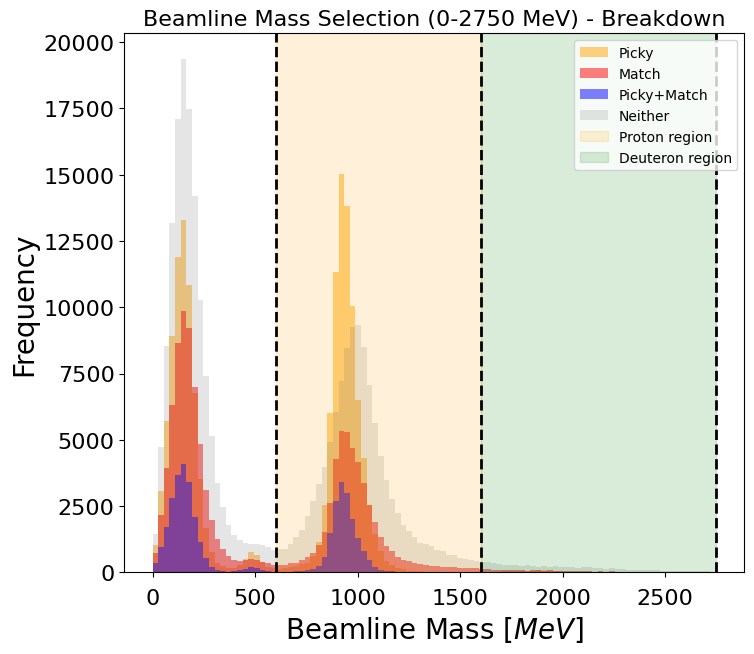

In [34]:
p = df[(df['p'] == 1)]['beamline_mass']
m = df[(df['m'] == 1)]['beamline_mass']
pm = df[(df['p'] == 1) & (df['m'] == 1)]['beamline_mass']
rest = df[(df['p'] == 0) & (df['m'] == 0)]['beamline_mass']

plt.figure(figsize=(8, 7))  # Create a figure with specified size

plt.hist(
    p,  # Data to plot
    bins=100,  # Number of bins
    color='orange',  # Bar color
    range=(0, 2750),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Picky'  # Label for the data
)

plt.hist(
    m,  # Data to plot
    bins=100,  # Number of bins
    color='red',  # Bar color
    range=(0, 2750),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Match'  # Label for the data
)

plt.hist(
    pm,  # Data to plot
    bins=100,  # Number of bins
    color='blue',  # Bar color
    range=(0, 2750),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Picky+Match'  # Label for the data
)

plt.hist(
    rest,  # Data to plot
    bins=100,  # Number of bins
    color='grey',  # Bar color
    range=(0, 2750),  # Adjusted range to fit the filtered values
    alpha=0.2,  # Transparency of the bars
    label='Neither'  # Label for the data
)

# Customize tick parameters for better visualization
plt.tick_params(axis='x', labelsize=16, pad=8)
plt.tick_params(axis='y', labelsize=16)

# Label axes
plt.xlabel('Beamline Mass [$MeV$]', fontsize=20)
plt.ylabel('Frequency', fontsize=20)  # Added y-axis label for clarity

# Add a title
plt.title('Beamline Mass Selection (0-2750 MeV) - Breakdown', fontsize=16)

plt.axvline(600, color='black', linestyle='--', linewidth=2)
plt.axvline(1600, color='black', linestyle='--', linewidth=2)
plt.axvline(2750, color='black', linestyle='--', linewidth=2)

plt.axvspan(600, 1600, color='orange', alpha=0.15, label='Proton region')
plt.axvspan(1600, 2750, color='green', alpha=0.15, label='Deuteron region')

# Add a legend
plt.legend()

# Show the plot
plt.show()

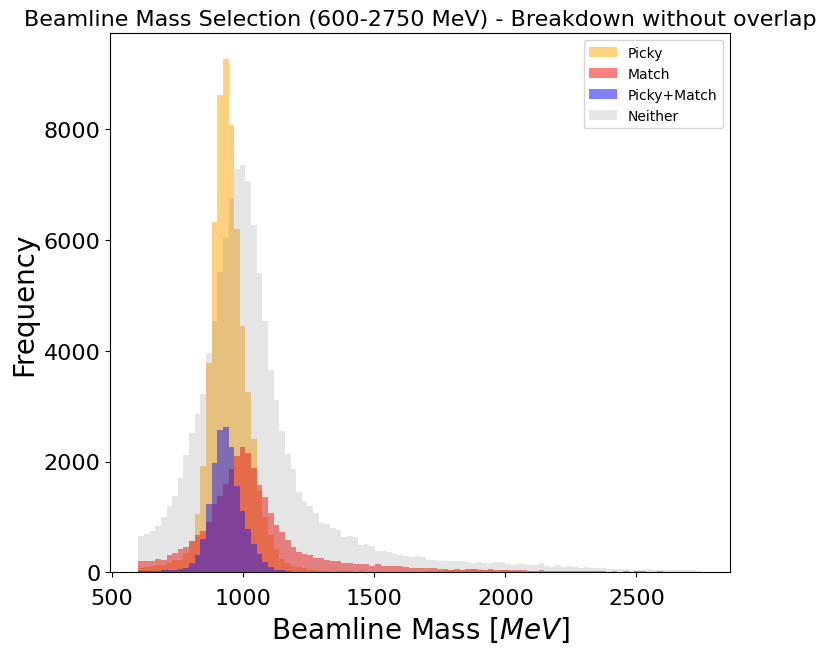

In [12]:
p = df[(df['p'] == 1) & (df['m'] == 0)]['beamline_mass']
m = df[(df['m'] == 1) & (df['p'] == 0)]['beamline_mass']
pm = df[(df['p'] == 1) & (df['m'] == 1)]['beamline_mass']
rest = df[(df['p'] == 0) & (df['m'] == 0)]['beamline_mass']

plt.figure(figsize=(8, 7))  # Create a figure with specified size

plt.hist(
    p,  # Data to plot
    bins=100,  # Number of bins
    color='orange',  # Bar color
    range=(600, 2750),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Picky'  # Label for the data
)

plt.hist(
    m,  # Data to plot
    bins=100,  # Number of bins
    color='red',  # Bar color
    range=(600, 2750),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Match'  # Label for the data
)

plt.hist(
    pm,  # Data to plot
    bins=100,  # Number of bins
    color='blue',  # Bar color
    range=(600, 2750),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Picky+Match'  # Label for the data
)

plt.hist(
    rest,  # Data to plot
    bins=100,  # Number of bins
    color='grey',  # Bar color
    range=(600, 2750),  # Adjusted range to fit the filtered values
    alpha=0.2,  # Transparency of the bars
    label='Neither'  # Label for the data
)

# Customize tick parameters for better visualization
plt.tick_params(axis='x', labelsize=16, pad=8)
plt.tick_params(axis='y', labelsize=16)

# Label axes
plt.xlabel('Beamline Mass [$MeV$]', fontsize=20)
plt.ylabel('Frequency', fontsize=20)  # Added y-axis label for clarity

# Add a title
plt.title('Beamline Mass Selection (600-2750 MeV) - Breakdown without overlap', fontsize=16)

# Add a legend
plt.legend()

# Show the plot
plt.show()

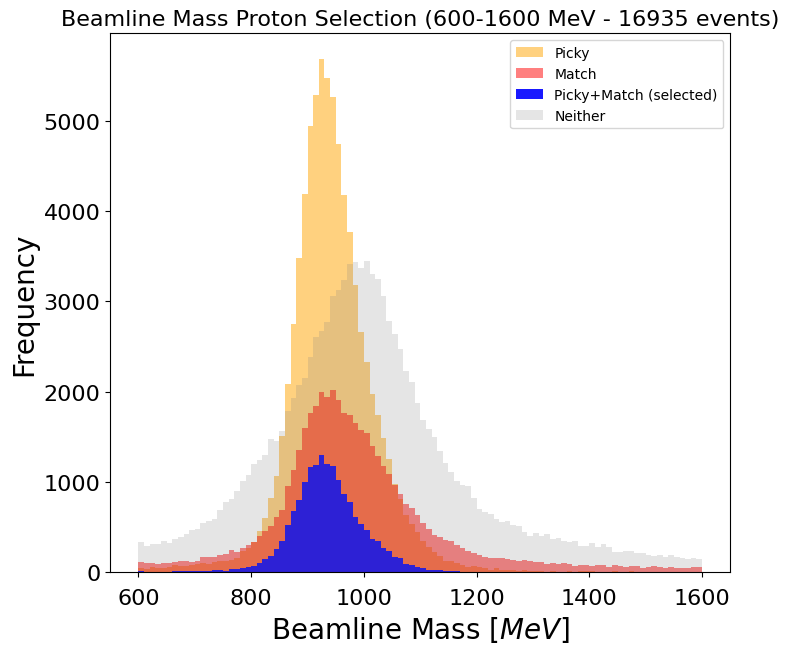

In [38]:
plt.figure(figsize=(8, 7))  # Create a figure with specified size

plt.hist(
    p,  # Data to plot
    bins=100,  # Number of bins
    color='orange',  # Bar color
    range=(600, 1600),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Picky'  # Label for the data
)

plt.hist(
    m,  # Data to plot
    bins=100,  # Number of bins
    color='red',  # Bar color
    range=(600, 1600),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Match'  # Label for the data
)

plt.hist(
    pm,  # Data to plot
    bins=100,  # Number of bins
    color='blue',  # Bar color
    range=(600, 1600),  # Adjusted range to fit the filtered values
    alpha=0.9,  # Transparency of the bars
    label= 'Picky+Match (selected)'  # Label for the data
)

plt.hist(
    rest,  # Data to plot
    bins=100,  # Number of bins
    color='grey',  # Bar color
    range=(600, 1600),  # Adjusted range to fit the filtered values
    alpha=0.2,  # Transparency of the bars
    label='Neither'  # Label for the data
)

# Customize tick parameters for better visualization
plt.tick_params(axis='x', labelsize=16, pad=8)
plt.tick_params(axis='y', labelsize=16)

# Label axes
plt.xlabel('Beamline Mass [$MeV$]', fontsize=20)
plt.ylabel('Frequency', fontsize=20)  # Added y-axis label for clarity

# Add a title
plt.title('Beamline Mass Proton Selection (600-1600 MeV - 16935 events)', fontsize=16)

# Add a legend
plt.legend()

# Show the plot
plt.show()

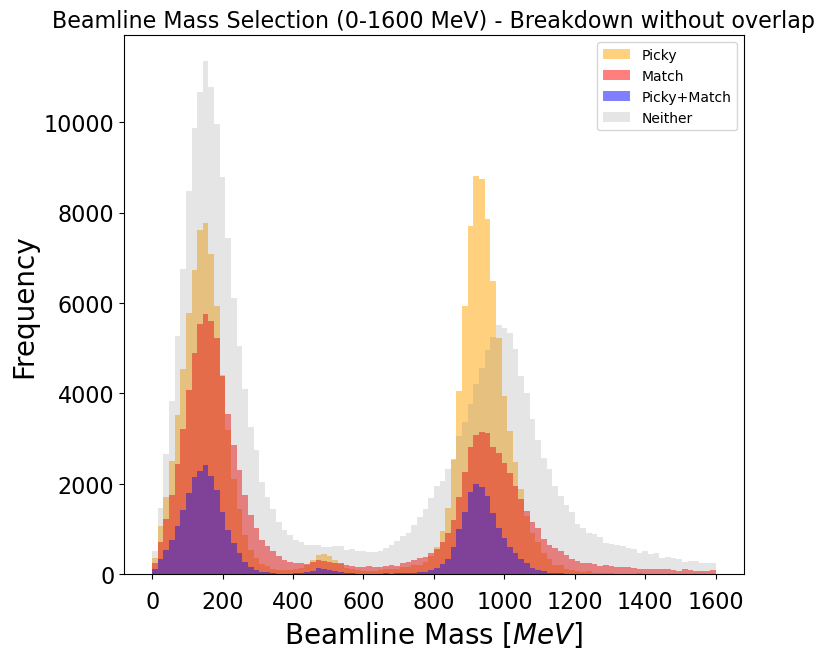

In [12]:
plt.figure(figsize=(8, 7))  # Create a figure with specified size

plt.hist(
    p,  # Data to plot
    bins=100,  # Number of bins
    color='orange',  # Bar color
    range=(0, 1600),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Picky'  # Label for the data
)

plt.hist(
    m,  # Data to plot
    bins=100,  # Number of bins
    color='red',  # Bar color
    range=(0, 1600),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Match'  # Label for the data
)

plt.hist(
    pm,  # Data to plot
    bins=100,  # Number of bins
    color='blue',  # Bar color
    range=(0, 1600),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Picky+Match'  # Label for the data
)

plt.hist(
    rest,  # Data to plot
    bins=100,  # Number of bins
    color='grey',  # Bar color
    range=(0, 1600),  # Adjusted range to fit the filtered values
    alpha=0.2,  # Transparency of the bars
    label='Neither'  # Label for the data
)

# Customize tick parameters for better visualization
plt.tick_params(axis='x', labelsize=16, pad=8)
plt.tick_params(axis='y', labelsize=16)

# Label axes
plt.xlabel('Beamline Mass [$MeV$]', fontsize=20)
plt.ylabel('Frequency', fontsize=20)  # Added y-axis label for clarity

# Add a title
plt.title('Beamline Mass Selection (0-1600 MeV) - Breakdown without overlap', fontsize=16)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [16]:
df

,run,subrun,event,p,m,beamline_mass
0,8675,12,1249,0,1,1082.48
1,8675,12,1250,0,0,120.62
2,8675,12,1256,0,1,893.74
3,8675,12,1257,1,0,180.31
4,8675,12,1261,0,1,1102.05
...,...,...,...,...,...,...
480068,9781,133,21589,0,1,1337.60
480069,9781,133,21593,0,1,1008.86
480070,9781,133,21596,0,1,1212.37
480071,9781,133,21614,0,0,951.96


In [22]:
pm = df[(df['p'] == 1) & (df['m'] == 1)]
pm

,run,subrun,event,p,m,beamline_mass
19,8675,12,1305,1,1,42.63
37,8675,15,1654,1,1,141.89
45,8675,15,1665,1,1,53.68
49,8675,15,1677,1,1,158.14
65,8675,30,3396,1,1,94.70
...,...,...,...,...,...,...
480019,9781,124,20183,1,1,165.30
480027,9781,124,20209,1,1,793.25
480032,9781,127,20662,1,1,169.87
480038,9781,127,20677,1,1,997.87


In [23]:
protons = pm[(pm['beamline_mass'] >= 600) & (pm['beamline_mass'] <= 1600)]
protons

,run,subrun,event,p,m,beamline_mass
99,8675,38,4220,1,1,916.41
155,8675,40,4514,1,1,963.00
168,8675,54,5807,1,1,1015.20
172,8675,54,5821,1,1,932.41
186,8675,54,5843,1,1,867.25
...,...,...,...,...,...,...
479939,9781,109,17974,1,1,950.14
479942,9781,111,18262,1,1,965.07
479974,9781,112,18441,1,1,997.18
480027,9781,124,20209,1,1,793.25


In [ ]:
protons[['run', 'subrun', 'event']].to_csv('preprotons_pm_600_1600.csv', index=False)

In [27]:
deuterons = df[(df['beamline_mass'] > 1600) & (df['beamline_mass'] <= 2750)]
deuterons

,run,subrun,event,p,m,beamline_mass
354,8675,95,9908,0,1,1796.75
467,8675,110,11580,0,0,2125.92
477,8675,110,11595,0,0,1874.40
612,8675,130,13825,0,0,2411.84
656,8675,135,14423,0,0,1888.11
...,...,...,...,...,...,...
479935,9781,109,17959,0,1,2513.53
479941,9781,109,18002,0,0,2497.32
480000,9781,119,19466,0,0,1671.93
480034,9781,127,20666,0,0,2012.50


In [ ]:
deuterons[['run', 'subrun', 'event']].to_csv('predeuterons_all_1600_2750.csv', index=False)